Carichiamo i pacchetti necessari e il dataset.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
#from surprise import Reader, Dataset, SVD, evaluate


import warnings
warnings.filterwarnings('ignore')

In [2]:
data_movies = pd.read_csv('tmdb_5000_movies.csv')
data_credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
data_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
data_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Uniamo i due dataframe in un unico dataframe che chiamiamo "data":

In [5]:
data_movies['cast'] = data_credits['cast']
data_movies['crew'] = data_credits['crew']
data = data_movies
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Studiamo il dataframe tramite la matrice di correlazione e una serie di grafici che rappresentano le correlazioni tra le features numeriche.

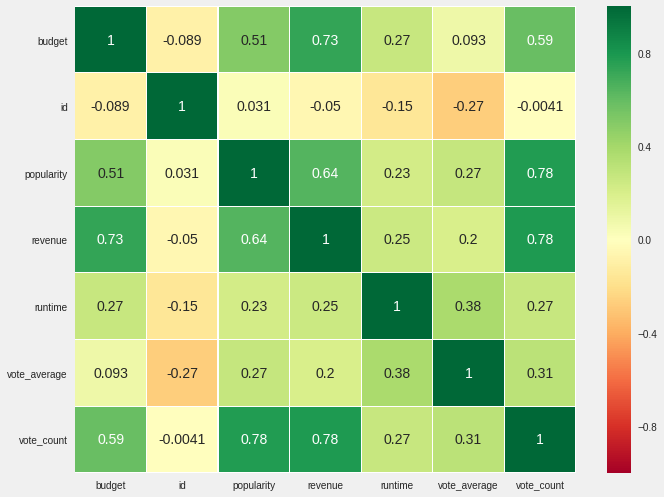

In [6]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [7]:
data.shape

(4803, 22)

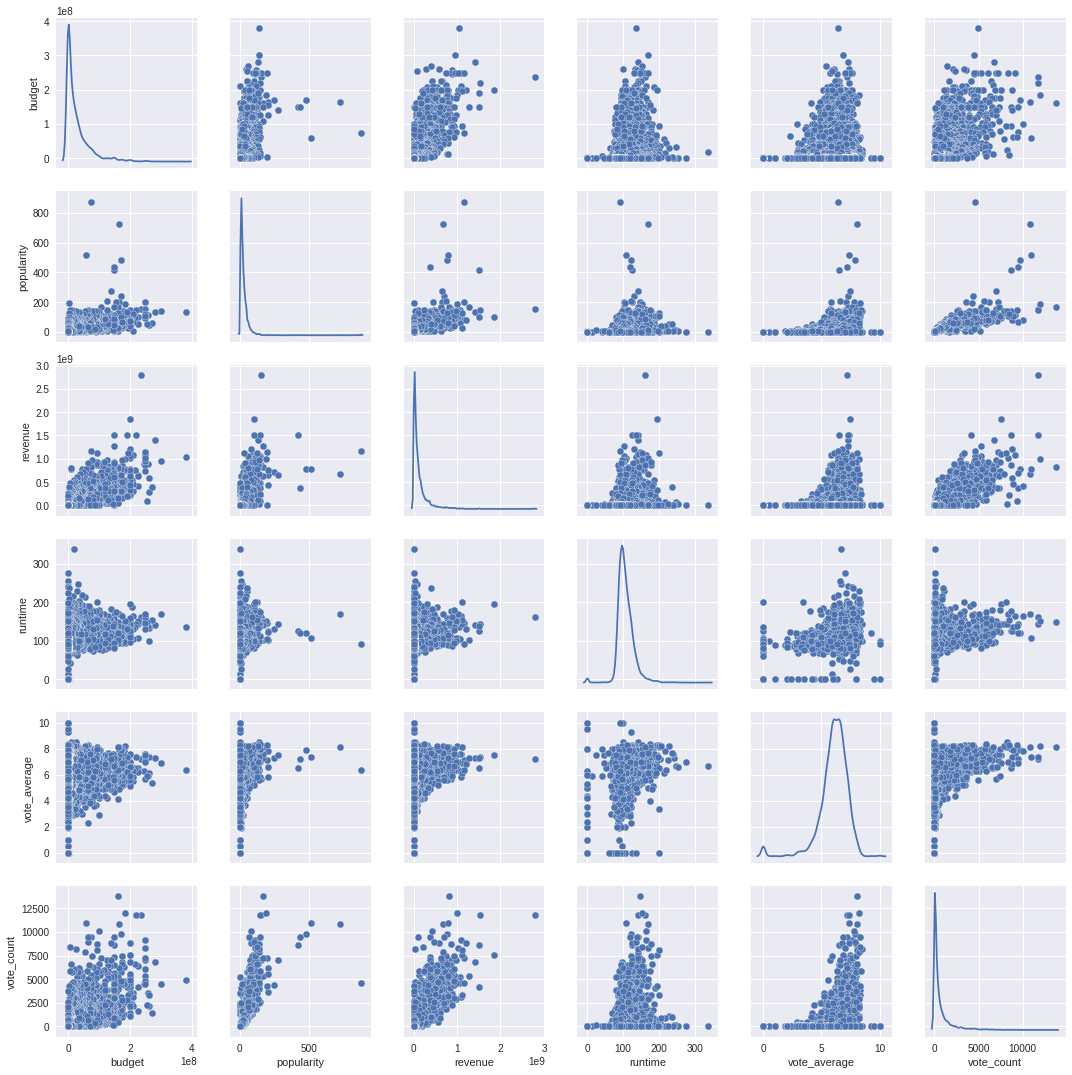

In [8]:
sns.set()
cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
sns.pairplot(data[cols], diag_kind = "kde", size = 2.5)
plt.show();


Contiamo quanti valori mancano nel nostro dataframe (NaN):

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
homepage,3091,0.643556
tagline,844,0.175724
overview,3,0.000625
runtime,2,0.000416
release_date,1,0.000208
crew,0,0.000000
popularity,0,0.000000
genres,0,0.000000
id,0,0.000000
keywords,0,0.000000


Osserviamo che mancano numerosi valori per le features "homepage" (il 64% delle homepage manca) e "tagline" (manca il 18% delle tagline). Risulta difficile andare a sostituire questi valori, dal momento che non possono essere ricavati dalle features che abbiamo a disposizione. Inoltre sono troppi i valori mancanti per poterli andare a riempire manualmente, quindi eliminiamo queste features dal nostro dataframe.

In [10]:
data = data.drop('homepage', 1)

In [11]:
data = data.drop('tagline', 1)

In [12]:
data.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Osserviamo che abbiamo effettivamente eliminato le feature "homepage" e "tagline".

Cerchiamo ora di eliminare i valori NaN presenti nelle feature "release_date" e "runtime".

In [13]:
data.loc[data.release_date.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0,[],[]


Manca solamente un valore per la feature "release_date", possiamo quindi inserirlo manualmente.

In [14]:
data.loc[(data.release_date.isnull()), 'release_date'] = pd.to_datetime('2017-01-11', format='%Y-%d-%m')

In [15]:
print(data.loc[data.id == 380097])

      budget genres      id keywords original_language  \
4553       0     []  380097       []                en   

                  original_title  \
4553  America Is Still the Place   

                                               overview  popularity  \
4553  1971 post civil rights San Francisco seemed li...         0.0   

     production_companies production_countries         release_date  revenue  \
4553                   []                   []  2017-11-01 00:00:00        0   

      runtime spoken_languages    status                       title  \
4553      0.0               []  Released  America Is Still the Place   

      vote_average  vote_count cast crew  
4553           0.0           0   []   []  


Controlliamo che nessun valore della colonna "release_date" sia nullo:

In [16]:
data.release_date.isnull().any

<bound method Series.any of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4773    False
4774    False
4775    False
4776    False
4777    False
4778    False
4779    False
4780    False
4781    False
4782    False
4783    False
4784    False
4785    False
4786    False
4787    False
4788    False
4789    False
4790    False
4791    False
4792    False
4793    False
4794    False
4795    False
4796    False
4797    False
4798    False
4799    False
4800    False
4801    False
4802    False
Name: release_date, dtype: bool>

Osserviamo che non risultano più esserci valori NaN nella feature "release_date".

Facciamo la stessa cosa per la feature "runtime" (questa volta i valori mancanti dovrebbero essere due).

In [17]:
data.loc[data.runtime.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


Sono solamente due i valori mancanti per questa feature, anche in questo caso possiamo andarli a riempire manualmente.

In [18]:
data.loc[(data.id == 370980), 'runtime'] = 98.0

In [19]:
data.loc[(data.id == 459488), 'runtime'] = 81.0

In [20]:
print(data.loc[(data.id == 370980)]) # prova per verificare che il valore del runtime sia stato sostituito

        budget                         genres      id  \
2656  15000000  [{"id": 18, "name": "Drama"}]  370980   

                                               keywords original_language  \
2656  [{"id": 717, "name": "pope"}, {"id": 5565, "na...                it   

                                  original_title overview  popularity  \
2656  Chiamatemi Francesco - Il Papa della gente      NaN    0.738646   

                        production_companies  \
2656  [{"name": "Taodue Film", "id": 45724}]   

                         production_countries release_date  revenue  runtime  \
2656  [{"iso_3166_1": "IT", "name": "Italy"}]   2015-12-03        0     98.0   

                                   spoken_languages    status  \
2656  [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]  Released   

                                           title  vote_average  vote_count  \
2656  Chiamatemi Francesco - Il Papa della gente           7.3          12   

                                     

Abbiamo eliminato o sostituito tutti i valori NaN che comparivano nel dataframe. Esploriamo "data" per vedere come è cambiato.

In [21]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.868624,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.610670,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Andiamo a rappresentare la matrice di correlazione. Ricordiamo che nella matrice di correlazione vengono tenuti in considerazione solamente i valori numerici e non le stringhe.

In [22]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.868624,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.610670,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Osserviamo che le features "budget", "popularity", "revenue", "runtime", "vote_average" e "vote_count" hanno come valore "min" 0. Esaminiamole nel dettaglio.

In [23]:
data.loc[data.popularity == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],2017-11-01 00:00:00,0,0.0,[],Released,America Is Still the Place,0.0,0,[],[]


Solamente una variabile ha un valore pari a 0 nella feature "popularity", andiamo quindi a sostituire il valore medio di questa feature nella variabile mancante.

In [24]:
data.popularity.mean()

21.492300588174057

In [25]:
data.popularity[(data.id == 380097)] = 21.49

In [26]:
print(data.popularity[(data.id == 380097)])

4553    21.49
Name: popularity, dtype: float64


In [27]:
data.loc[data.vote_count == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
3960,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",170480,[],en,The Deported,An Italian-American actor is deported to Mexic...,0.194848,[],[],2010-06-15,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Deported,0.0,0,"[{""cast_id"": 6, ""character"": ""Gianni DiCarlo"",...","[{""credit_id"": ""531de389c3a3685c560083f3"", ""de..."
3967,3,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",79587,[],en,Four Single Fathers,A comedy/drama about four Italian single fathe...,0.008263,"[{""name"": ""Indiana Production Company"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-01-15,0,100.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Four Single Fathers,0.0,0,"[{""cast_id"": 1, ""character"": ""Jacopo"", ""credit...","[{""credit_id"": ""558ac9d6c3a3680545005999"", ""de..."
4051,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",433715,"[{""id"": 10060, ""name"": ""christian film""}, {""id...",en,8 Days,"After sneaking to a party with her friends, 16...",0.015295,"[{""name"": ""After Eden Pictures"", ""id"": 85248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-06-15,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,8 Days,0.0,0,"[{""cast_id"": 3, ""character"": ""Amber"", ""credit_...","[{""credit_id"": ""58713acfc3a3684f0a00a9ac"", ""de..."
4065,2100000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",364083,"[{""id"": 40865, ""name"": ""new york state""}, {""id...",en,Mi America,A hate-crime has been committed in a the small...,0.039007,

Ci sono moltissimi film che non hanno nemmeno un voto, e di conseguenza non hanno nemmeno una media voto. Per la maggior parte di questi film mancano anche le feature "budget" e "revenue".

Iniziamo con l'eliminare i film in cui non c'è nessuna di queste feature.

In [28]:
data.shape #controlliamo le dimensioni del data frame prima di andare a modificarlo

(4803, 20)

In [29]:
for index, row in data.iterrows():
    if int(round(row['budget'])) == 0 & int(round(row['revenue'])) == 0 & row['vote_count'] == 0 & int(round(row['vote_average'])) == 0 : 
      data = data.drop(index, axis = 0)
    

In [30]:
data.shape

(3766, 20)

In [31]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.766000e+03,3766.000000,3766.000000,3.766000e+03,3766.000000,3766.000000,3766.000000
mean,3.704284e+07,50257.822623,25.984641,1.039547e+08,109.313861,6.226474,856.496814
std,4.264651e+07,82138.278362,34.438253,1.776399e+08,20.753847,0.966228,1344.785690
min,1.000000e+00,5.000000,0.001586,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+06,7196.750000,7.974990,6.009736e+06,95.000000,5.700000,114.000000
50%,2.300000e+07,12097.000000,17.604955,3.883137e+07,105.000000,6.300000,365.500000
75%,5.000000e+07,49523.250000,33.925801,1.220873e+08,120.000000,6.900000,969.250000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


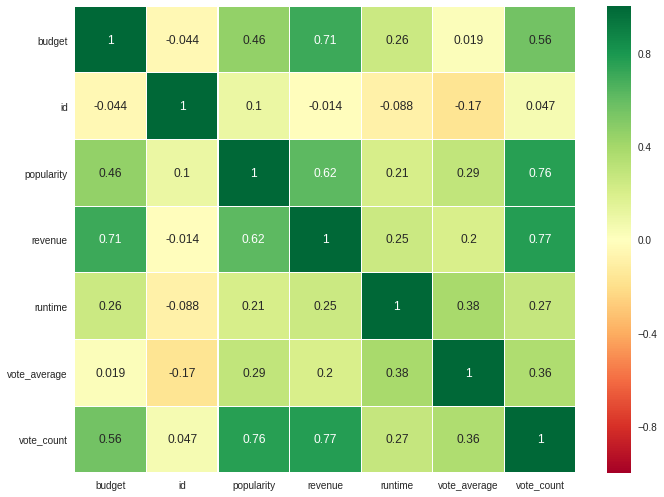

In [32]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Il fatto che il valore minimo di "vote_count" e "vote_average" sia 0 ha senso. Se infatti nessuno ha visto il film preso in esame, la sua feature "vote_count" sarà nulla, e quindi lo sarà anche la corrispondente feature "vote_average". Andiamo però a vedere quali valori hanno la feature "runtime" pari a 0 e cerchiamo di sistemarle.

In [33]:
data.loc[data.runtime == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,How to Fall in Love,5.2,20,"[{""cast_id"": 1, ""character"": ""Annie Hayes"", ""c...","[{""credit_id"": ""52fe4bdd9251416c910e82a3"", ""de..."
4241,1500000,"[{""id"": 35, ""name"": ""Comedy""}]",51820,"[{""id"": 10183, ""name"": ""independent film""}]",en,The Salon,A Beauty shop owner finds romance as she strug...,2.028170,[],[],2005-01-13,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Salon,3.5,1,"[{""cast_id"": 2, ""character"": ""Ricky"", ""credit_...","[{""credit_id"": ""52fe4805c3a36847f815475f"", ""de..."


Ci sono due valori per cui la feature "runtime" risulta essere nulla, andiamo a modificarla manualmente:

In [34]:
data.runtime[(data.id == 158150)] = 84.0 

In [35]:
data.runtime[(data.id == 51820)] = 98.0

In [36]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.766000e+03,3766.000000,3766.000000,3.766000e+03,3766.000000,3766.000000,3766.000000
mean,3.704284e+07,50257.822623,25.984641,1.039547e+08,109.362188,6.226474,856.496814
std,4.264651e+07,82138.278362,34.438253,1.776399e+08,20.605251,0.966228,1344.785690
min,1.000000e+00,5.000000,0.001586,0.000000e+00,41.000000,0.000000,0.000000
25%,8.000000e+06,7196.750000,7.974990,6.009736e+06,95.000000,5.700000,114.000000
50%,2.300000e+07,12097.000000,17.604955,3.883137e+07,105.000000,6.300000,365.500000
75%,5.000000e+07,49523.250000,33.925801,1.220873e+08,120.000000,6.900000,969.250000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [37]:
print(data.runtime[(data.id == 158150)])
print(data.runtime[(data.id == 51820)])

3809    84.0
Name: runtime, dtype: float64
4241    98.0
Name: runtime, dtype: float64


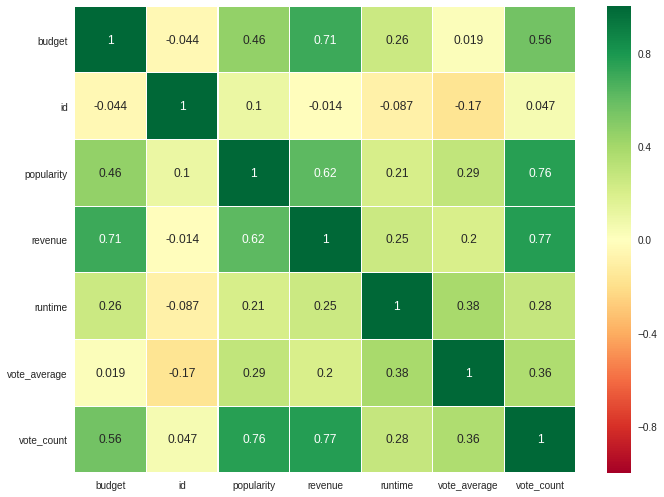

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Effettivamente non risultano più valori nulli per la feature "runtime".

In [39]:
data.loc[data.vote_average == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
3967,3,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",79587,[],en,Four Single Fathers,A comedy/drama about four Italian single fathe...,0.008263,"[{""name"": ""Indiana Production Company"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-01-15,0,100.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Four Single Fathers,0.0,0,"[{""cast_id"": 1, ""character"": ""Jacopo"", ""credit...","[{""credit_id"": ""558ac9d6c3a3680545005999"", ""de..."
4065,2100000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",364083,"[{""id"": 40865, ""name"": ""new york state""}, {""id...",en,Mi America,A hate-crime has been committed in a the small...,0.039007,"[{""name"": ""Industrial House Films"", ""id"": 65589}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-16,3330,126.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Mi America,0.0,0,"[{""cast_id"": 6, ""character"": ""Roe Ramirez"", ""c...","[{""credit_id"": ""576ec0019251416cae008521"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,81.0,[],Released,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4293,1,[],357834,[],en,The Algerian,The Algerian is an international political thr...,0.025364,"[{""name"": ""Zelko Films"", ""id"": 62451}]","[{""iso_3166_1"": ""DZ"", ""name"": ""Algeria""}, {""is...",2015-08-07,0,99.0,[],Released,The Algerian,0.0,0,"[{""cast_id"": 8, ""character"": ""Ali"", ""credit_id...","[{""credit_id"": ""55e8591ac3a3682c640023d1"", ""de..."
4307,1200000,"[{""id"": 35, ""name"": ""Comedy""}]",49951,[],en,Certifiably Jonathan,A famous comedian and artist wants to display ...,0.047781,[],[],2007-03-01,0,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Certifiably Jonathan,0.0,0,"[{""cast_id"": 1, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""582bc51092514111c0002141"", ""de..."
4486,700000,"[{""id"": 18, ""name"": ""Drama""}]",302579,"[{""id"": 10322, ""name"": ""native american""}, {""i...",en,Naturally Native,"Naturally Native follows the lives, loves, pai...",0.578798,"[{""name"": ""Red-horse Native"", ""id"": 38147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-10-08,10508,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Naturally Native,0.0,0,"[{""cast_id"": 0, ""character"": ""Vickie Lewis Big...","[{""credit_id"": ""5462d90c0e0a2677fd00116d"", ""de..."
4508,56000,"[{""id"": 99, ""name"": ""Documentary""}]",70875,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...",en,The Harvest (La Cosecha),The story of the children who work 12-14 hour ...,0.010909,[],[],2011-07-29,0,80.0,[],Rumored,The Harvest (La Cosecha),0.0,0,[],"[{""credit_id"": ""52fe4816c3a368484e0e8bbd"", ""de..."
4556,500,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",119657,[],en,El Rey de Najayo,"The dramatic story of Jul

Osserviamo che i film per i quali la feature "vote_average" è uguale a 0 sono gli stessi film che hanno feature "vote_count" uguale a 0. Quindi significa che non sono valori mancanti!

Andiamo quindi a concludere l'analisi del data frame controllando l'ultima feature, "revenue".

In [40]:
data.loc[data.revenue == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de..."
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de..."
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Son of the Mask,3.6,338,"[{""cast_id"": 1, ""character"": ""Tim Avery"", ""cre...","[{""credit_id"": ""52fe43439251416c75009b91"", ""de..."
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,Volcano,5.2,376,"[{""cast_id"": 10, ""character"": ""Mike Roark"", ""c...","[{""credit_id"": ""52fe435f9251416c7500dded"", ""de..."
433,84000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",146216,"[{""id"": 90, ""name"": ""paris""}, {""id"": 212, ""nam...",en,RED 2,Retired C.I.A. agent Frank Moses reunites his ...,44.343330,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""D...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2013-07-18,0,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,RED 2,6.4,1526,"[{""cast_id"": 1, ""character"": ""Frank Moses"", ""c...","[{""credit_id"": ""536642c5c3a3681238002cc2"", ""de..."
467,90000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",9822,"[{""id"": 690, ""name"": ""gorilla""}, {""id"": 3737, ...",en,Mighty Joe Young,"As a child living in Africa, Jill Young saw he...",6.643778,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-12-25,0,114.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,Mighty Joe Young,5.9,208,"[{""cast_id"": 1, ""character"": ""Jill Young"", ""cr...","[{""credit_id"": ""571c23c4c3a36864e0003ca3"", ""de..."
471,85000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",9678,"[{""id"": 494, ""name"": ""father son relationship""...",en,Little Nicky,After the lord of darkness decides he will not...,18.335992,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2000-11-10,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Little Nicky,5.2,438,"[{""cast_id"": 1, ""character"": ""Nicky"", ""credit_...","[{""credit_id"": ""52fe4

Dobbiamo lavorare sulla feature "revenue". Mancano infatti 535 valori!!!

Proviamo a predire la feature "revenue" tramite algoritmi di machine learning.

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import Ridge

In [42]:
data_withrevenue = data
data_norevenue = data
for index, row in data.iterrows():
    if int(round(row['revenue']))==0: 
      data_withrevenue = data_withrevenue.drop(index, axis = 0)
    else :
     data_norevenue = data_norevenue.drop(index, axis = 0)

In [43]:
data_withrevenue.shape

(3229, 20)

In [44]:
data_norevenue.shape

(537, 20)

In [45]:
y = data_withrevenue['revenue']

In [46]:
X = data_withrevenue[['vote_count', 'popularity', 'budget']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [49]:
predictions = lm.predict(X_test)

In [50]:
print(predictions[0:5])

[  1.52070253e+08   8.20275802e+07   1.68285650e+08   1.74783236e+06
   4.34570073e+07]


In [51]:
lm.score(X_train, y_train)

0.70854745826363974

Andiamo a riempire il data frame senza "revenue".

In [52]:
pred = lm.predict(data_norevenue[['vote_count', 'popularity', 'budget']])
print(pred)

[  3.07032768e+07   2.62321295e+08   1.44821221e+08   1.57358893e+08
   2.24850458e+08   1.41741515e+08   1.52351653e+08  -1.40621074e+06
   1.29395816e+08   1.20546591e+08   1.18927643e+08   9.69948139e+07
   1.06136945e+08   9.17880106e+07   1.09966189e+08   1.18372537e+08
   1.00921889e+08   8.46459117e+07   1.09244854e+08   1.27085806e+08
   9.94276752e+07   4.95117165e+07   9.01679062e+07   1.10760812e+08
   1.10378873e+08   9.22649208e+07   1.22793730e+08   8.50138234e+07
   8.94269749e+07   8.98334696e+07   9.48393688e+07   8.56997769e+07
   7.32749011e+07   5.77172417e+07   8.44391069e+07   8.27516246e+07
   7.36308183e+07   6.87070017e+07   6.45553423e+07   6.98620099e+07
   8.17360289e+07   1.30187128e+06   6.12987275e+07   6.72056365e+07
   5.57064802e+07   8.82368479e+07   7.24390169e+07   5.78374994e+07
   7.84127089e+07   9.91439556e+07   7.07049600e+07   5.36929353e+07
   7.79790403e+07   5.58986586e+07   6.02037255e+07   5.09075259e+07
   5.45701801e+07   5.60018999e+07

In [53]:
i = 0
for index, row in data_norevenue.iterrows() :
    data_norevenue.loc[index, 'revenue'] = pred[i]
    i = i + 1

In [54]:
data_norevenue.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,3.070328e+07,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de..."
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,2.623213e+08,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de..."
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,1.448212e+08,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Son of the Mask,3.6,338,"[{""cast_id"": 1, ""character"": ""Tim Avery"", ""cre...","[{""credit_id"": ""52fe43439251416c75009b91"", ""de..."
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,1.573589e+08,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,Volcano,5.2,376,"[{""cast_id"": 10, ""character"": ""Mike Roark"", ""c...","[{""credit_id"": ""52fe435f9251416c7500dded"", ""de..."
433,84000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",146216,"[{""id"": 90, ""name"": ""paris""}, {""id"": 212, ""nam...",en,RED 2,Retired C.I.A. agent Frank Moses reunites his ...,44.343330,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""D...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2013-07-18,2.248505e+08,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,RED 2,6.4,1526,"[{""cast_id"": 1, ""character"": ""Frank Moses"", ""c...","[{""credit_id"": ""536642c5c3a3681238002cc2"", ""de..."


In [55]:
data_norevenue.loc[data_norevenue.revenue == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew


Abbiamo effettivamente riempito tutti i valori nulli della feature "revenue".

In [56]:
k = 0
for index, row in data.iterrows():
    if int(round(row['revenue']))==0: 
      data.loc[index, 'revenue'] = pred[k]
      k = k+1

In [57]:
data.loc[data.revenue == 0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew


In [58]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.766000e+03,3766.000000,3766.000000,3.766000e+03,3766.000000,3766.000000,3766.000000
mean,3.704284e+07,50257.822623,25.984641,1.068369e+08,109.362188,6.226474,856.496814
std,4.264651e+07,82138.278362,34.438253,1.766466e+08,20.605251,0.966228,1344.785690
min,1.000000e+00,5.000000,0.001586,-1.483713e+07,41.000000,0.000000,0.000000
25%,8.000000e+06,7196.750000,7.974990,1.183783e+07,95.000000,5.700000,114.000000
50%,2.300000e+07,12097.000000,17.604955,4.402381e+07,105.000000,6.300000,365.500000
75%,5.000000e+07,49523.250000,33.925801,1.229181e+08,120.000000,6.900000,969.250000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


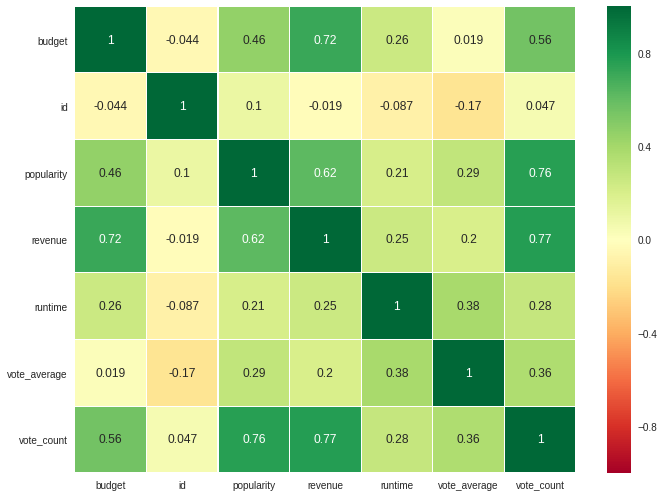

In [59]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Al momento ci siamo concentrati solamente sulle features numeriche, quindi su "budget", "popularity", "revenue", "runtime", "vote_average", "vote_count". 
Il nostro obbiettivo è stilare una lista di film da suggerire all'utente, il quale ci ha dato come informazione un film che ha apprezzato. Se basassimo le nostre previsioni solamente sulle features numeriche non avremmo nessun tipo di informazione specifica, otterremmo un risultato generale che sarebbe fornito a tutti gli utenti, indipendentemente dai suoi gusti. Dobbiamo quindi necessariamente tentare di prendere in considerazione le features 
stringhe, che possono dirci qualcosa di più specifico sui gusti dell'utente specifico. 

Iniziamo con lo studio della feature "genres".

In [60]:
data.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,8.908716e+08,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,5.91

In [61]:
data.genres

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
5       [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
6       [{"id": 16, "name": "Animation"}, {"id": 10751...
7       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
8       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
9       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
10      [{"id": 12, "name": "Adventure"}, {"id": 14, "...
11      [{"id": 12, "name": "Adventure"}, {"id": 28, "...
12      [{"id": 12, "name": "Adventure"}, {"id": 14, "...
13      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
14      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
15      [{"id": 12, "name": "Adventure"}, {"id": 10751...
16      [{"id": 878, "name": "Science Fiction"}, {"id"...
17      [{"id"

In [62]:
data.genres.describe()

count                              3766
unique                             1026
top       [{"id": 18, "name": "Drama"}]
freq                                249
Name: genres, dtype: object

Capiamo nello specifico che informazioni può fornire la feature "genres" per un film, ad esempio prendiamo il primo film della lista.

In [63]:
print(data.loc[0, "genres"])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


La feature "genres" risulta essere un dizionario, nel quale compaiono i vari generi che contraddistinguono il film preso in esame con il corrispondente "id". In questo caso (film "Avatar") compaiono come generi "Action", "Adventure", "Fantasy" e "Science Fiction".

In [64]:
print(data.loc[3001, "genres"])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 35, "name": "Comedy"}]


In [65]:
print(data.loc[0, "cast"])

[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 2

In [66]:
print(data.crew[0])

[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"}, 

Abbiamo 3 features, "popularity", "vote_count" e "vote_average", rappresentative del grado di apprezzamento di un certo film da parte del pubblico. Possiamo definire una funzione che prenda questi valori in input e che ritorni un unico valore indicativo del grado di apprezzamento del film. Chiamiamo questa funzione "pop".

In [67]:
def pop(movie):    

    return movie["popularity"] + movie["vote_count"] + movie["vote_average"] 

Proviamo ad utilizzare la funzione e controlliamo che effettivamente si comporti come ci aspettiamo:

In [68]:
pop(data.loc[0])

11957.637577000001

In [69]:
data.loc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                        150.438
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                       2.78797e+09
runtime                                                               162
spoken_languages        [{"iso_639_1":

La funzione "pop" effettivamente funziona. La utilizzeremo quindi come grado di apprezzamento da parte del pubblico di un determinato film.

Il problema di questa funzione è che la variabile "popularity" o la variabile "vote_count" può assumere valori molto più alti della variabile "vote_average", quindi queste features influenzano molto di più il valore finale restituito dalla funzione pop, e questo non va bene.

Come fare? Proviamo a standardizzare le funzioni.

Per prima cosa definiamo una funzione che normalizza le variabili (ovvero trasforma le variabili in maniera tale che assumano valori solamente nell'intervallo [0,1]).

In [70]:
from sklearn import preprocessing 
X = data.popularity
Y = data.vote_average
Z = data.vote_count
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
Z = Z.reshape(-1, 1)
scaled = preprocessing.MinMaxScaler()
normalized_popularity = scaled.fit_transform(X)
normalized_vote_average = scaled.fit_transform(Y)
normalized_vote_count = scaled.fit_transform(Z)

In [71]:
print(normalized_popularity)

[[ 0.17181301]
 [ 0.15884451]
 [ 0.12263327]
 ..., 
 [ 0.02661821]
 [ 0.01629572]
 [ 0.00073205]]


In [72]:
def pop_fin(movie):  
    
    X = data.popularity
    Y = data.vote_average
    Z = data.vote_count
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    Z = Z.reshape(-1, 1)
    scaled = preprocessing.MinMaxScaler()
    normalized_popularity = scaled.fit_transform(X)
    normalized_vote_average = scaled.fit_transform(Y)
    normalized_vote_count = scaled.fit_transform(Z)
    
    r = 0
    s = 0
    t = 0
    
    for i in X :
        if i == movie.popularity : 
            x = normalized_popularity[r]
            r = r+1
            
    for j in Y :
        if j == movie.vote_average : 
            y = normalized_vote_average[s]
            s = s+1
            
    for k in Z :
        if k == movie.vote_count : 
            z = normalized_vote_count[t]
            t = t+1
            
            return x + y + z 

In [73]:
print(X)

[[ 150.437577]
 [ 139.082615]
 [ 107.376788]
 ..., 
 [  23.307949]
 [  14.269792]
 [   0.642552]]


In [74]:
print(normalized_popularity)
len(normalized_popularity)

[[ 0.17181301]
 [ 0.15884451]
 [ 0.12263327]
 ..., 
 [ 0.02661821]
 [ 0.01629572]
 [ 0.00073205]]


3766

In [75]:
pop_fin(data.loc[987])

array([ 1.55987002])

Ritorniamo ora a lavorare sulle features stringhe, a partire da "genres".

In [76]:
data.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [77]:
len(data.genres[0])

134

La lunghezza della feature "genres" di una qualsiasi osservazione è pari a 134 perchè la legge come una stringa. Dobbiamo quindi cercare di trasformarla in un oggetto python. Lo stesso vale per le features "cast" e "crew".

In [78]:
def get_actors(movie) :
    
    import json
    from collections import namedtuple
    
    data_2 = movie.cast
    x = json.loads(data_2, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
    actors = [x[0].name, x[1].name, x[2].name]
    return(actors)
    
    
 # dal film passato in imput estraiamo i 3 principali attori del film
    

In [79]:
#prova funzione precedente

get_actors(data.loc[1])

['Johnny Depp', 'Orlando Bloom', 'Keira Knightley']

In [80]:
def get_director(movie) :
    
    import json
    from collections import namedtuple
    
    data_4 = movie.crew
    v = json.loads(data_4, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
    director = ""
    
    for i in range(len(v)) :
        if v[i].job == 'Director' :
            director = v[i].name
    return(director)    

In [81]:
get_director(data.loc[5]) 
# controlliamo che effettivamente la funzione restituisca il regista

'Sam Raimi'

In [82]:
def get_genres(movie) :
    
    import json
    from collections import namedtuple
    
    data_3 = movie.genres
    y = json.loads(data_3, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
    z = []
    
    
    for i in range(len(y)) :
        z.append(y[i].name)
    
    return(z)

In [83]:
get_genres(data.loc[10]) 
#controlliamo che la funzione gen_mov effettivamente restituisca un array contentente i generi del film fornito 
#in input

['Adventure', 'Fantasy', 'Action', 'Science Fiction']

Ho implementato una funzione grazie alla quale si può stilare una lista di film da raccomandare in base a tre diverse features: popolarity, vote average, vote counts. Come fa IMDB a stilare una lista dei miglior film? Fa una sorta di media pesata basata solamente sulle features vote average e vote counts. Vediamo come funziona.

NB ricorda che questi algoritmi provvedono a fornire una lista di migliori film basandosi su criteri generali, senza tenere conto dei gusti del singolo utente che la può utilizzare.

Implementiamo il sistema di votazione di IMDB. IMDB non attribuisce ad un film la media dei voti degli utenti rispetto quel film, bensì utilizza il seguente algoritmo: wr = (v/(v+m))R + (m/(v+m))C. R corrisponde alla media dei voti degli utenti rispetto al film considerato, v è il numero dei voti che si hanno per il film, m è il numero minimo di voti richiesto per entrare a far parte della lista dei 250 migliori film, infine C corrisponde alla media totale dei voti di tutti i film del database.

In [84]:
vote_counts = data['vote_count'].astype('int')
vote_averages = data['vote_average'].astype('int')
C = vote_averages.mean()
C

5.7817312798725435

In [85]:
m = vote_counts.quantile(0.60)
m

533.0

Per definire il numero di voti richiesto per essere inseriti nella lista IMDB dei 250 migliori film (m) abbiamo utilizzato il 95-quantile. Ciò significa che deve avere un numero di voti superiore o uguale al 95% dei film presenti nel database. (poi ho cambiato i valori perchè diventava troppo restrittivo)

In [86]:
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [87]:
data['year'].head(10) 

0    2009
1    2007
2    2015
3    2012
4    2012
5    2007
6    2010
7    2015
8    2009
9    2016
Name: year, dtype: object

In [88]:
qualified = data[(data['vote_count'] >= m) & (data['vote_count'].notnull()) & (data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(1509, 6)

In [89]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [90]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [91]:
qualified = qualified.sort_values('wr', ascending=False).head(250)
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
96,Inception,2010,13752,8,167.583710,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",7.917232
65,The Dark Knight,2008,12002,8,187.322927,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",7.905677
95,Interstellar,2014,10867,8,724.247784,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",7.896286
662,Fight Club,1999,9413,8,146.757391,"[{""id"": 18, ""name"": ""Drama""}]",7.881124
262,The Lord of the Rings: The Fellowship of the Ring,2001,8705,8,138.049577,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",7.872014
3232,Pulp Fiction,1994,8428,8,121.463076,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",7.868057
1881,The Shawshank Redemption,1994,8205,8,136.747729,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",7.864690
329,The Lord of the Rings: The Return of the King,2003,8064,8,123.630332,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",7.862471
809,Forrest Gump,1994,7927,8,138.133331,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",7.860244
330,The Lord of the Rings: The Two Towers,2002,7487,8,106.914973,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",7.852576


In [92]:
data.shape # il dataset dell'esempio che sto seguendo è molto più ampio, probabilemnte è per quello che i dati sono leggermente diversi

(3766, 21)

In [93]:
data['id'] = data['id'].astype('int')

In [94]:
directors = []
for index, row in data.iterrows():
    directors.append(get_director(row))


In [95]:
print(directors)

['James Cameron', 'Gore Verbinski', 'Sam Mendes', 'Christopher Nolan', 'Andrew Stanton', 'Sam Raimi', 'Nathan Greno', 'Joss Whedon', 'David Yates', 'Zack Snyder', 'Bryan Singer', 'Marc Forster', 'Gore Verbinski', 'Gore Verbinski', 'Zack Snyder', 'Andrew Adamson', 'Joss Whedon', 'Rob Marshall', 'Barry Sonnenfeld', 'Peter Jackson', 'Marc Webb', 'Ridley Scott', 'Peter Jackson', 'Chris Weitz', 'Peter Jackson', 'James Cameron', 'Joe Russo', 'Peter Berg', 'Colin Trevorrow', 'Sam Mendes', 'Sam Raimi', 'Shane Black', 'Tim Burton', 'Brett Ratner', 'Dan Scanlon', 'Michael Bay', 'Michael Bay', 'Sam Raimi', 'Marc Webb', 'Joseph Kosinski', 'Brad Lewis', 'Martin Campbell', 'Lee Unkrich', 'McG', 'James Wan', 'Marc Forster', 'Bryan Singer', 'J.J. Abrams', 'Bryan Singer', 'Baz Luhrmann', 'Mike Newell', 'Guillermo del Toro', 'Michael Bay', 'Steven Spielberg', 'Peter Sohn', 'Steve Purcell', 'Justin Lin', 'Andrew Stanton', 'Brett Ratner', 'Roland Emmerich', 'Robert Zemeckis', 'Lana Wachowski', 'David Yate

In [96]:
data['director'] = directors
data.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,year,director
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,James Cameron
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,Gore Verbinski
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,Sam Mendes
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012,Christopher Nolan
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012,Andrew Stanton


In [97]:
data['soup'] = data['keywords'] + data['cast'] + data['director'] + data['genres']
#data['soup'] = data['soup'].apply(lambda x: ' '.join(x))

In [98]:
data.soup[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}][{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name":

In [99]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(data['soup'])

In [100]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [101]:
data = data.reset_index()
titles = data['title']
indices = pd.Series(data.index, index=data['title'])

In [102]:
indices

title
Avatar                                            0
Pirates of the Caribbean: At World's End          1
Spectre                                           2
The Dark Knight Rises                             3
John Carter                                       4
Spider-Man 3                                      5
Tangled                                           6
Avengers: Age of Ultron                           7
Harry Potter and the Half-Blood Prince            8
Batman v Superman: Dawn of Justice                9
Superman Returns                                 10
Quantum of Solace                                11
Pirates of the Caribbean: Dead Man's Chest       12
The Lone Ranger                                  13
Man of Steel                                     14
The Chronicles of Narnia: Prince Caspian         15
The Avengers                                     16
Pirates of the Caribbean: On Stranger Tides      17
Men in Black 3                                   18
The Ho

In [103]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [104]:
get_recommendations('Eternal Sunshine of the Spotless Mind').head(10)

1608               Straight Outta Compton
1318                  The English Patient
2055                  Crank: High Voltage
694        Maze Runner: The Scorch Trials
3004                      West Side Story
2372                     New York Stories
2953                         Factory Girl
3384                         Garden State
2239                      Southland Tales
98      The Hobbit: An Unexpected Journey
Name: title, dtype: object

In [105]:
get_recommendations('The Dark Knight').head(10)

280                      American Gangster
286                       Django Unchained
9       Batman v Superman: Dawn of Justice
3                    The Dark Knight Rises
955                 The Life of David Gale
297                The Wolf of Wall Street
1970                      12 Years a Slave
2073                         Inherent Vice
119                          Batman Begins
1125                    The Social Network
Name: title, dtype: object

In [106]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = data.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'popularity']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [107]:
improved_recommendations('Eternal Sunshine of the Spotless Mind')

,title,vote_count,vote_average,popularity,wr
98,The Hobbit: An Unexpected Journey,8297,7,108.849621,6.926462
1608,Straight Outta Compton,1355,7,61.762330,6.656071
1069,The Fugitive,1220,7,54.884297,6.629585
3419,The Lives of Others,958,7,34.938177,6.564495
1770,August Rush,797,7,29.533437,6.511777
988,K-PAX,695,7,30.920075,6.471224
694,Maze Runner: The Scorch Trials,3040,6,113.161483,5.967440
209,The Bourne Legacy,2651,6,90.336810,5.963462
2055,Crank: High Voltage,861,5,35.542809,5.298897
76,G.I. Joe: The Rise of Cobra,1962,5,32.852443,5.166999


In [108]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,popularity,wr
286,Django Unchained,10099,7,82.121691,6.938926
3,The Dark Knight Rises,9106,7,112.312950,6.932634
68,Iron Man,8776,7,120.725053,6.930246
119,Batman Begins,7359,7,115.040024,6.917722
297,The Wolf of Wall Street,6571,7,95.007934,6.908596
1302,The Hangover,6173,7,82.211660,6.903171
679,Gone Girl,5862,7,143.041543,6.898462
159,Spider-Man,5265,6,82.502566,5.979935
9,Batman v Superman: Dawn of Justice,7004,5,155.790452,5.055282
72,Suicide Squad,7458,5,90.237920,5.052142
